## **Notebook EC02**
## Regularized Linear Classifiers for MNIST database.
**Professor:** Fernando J. Von Zuben <br>
**Aluno(a):** Daniele Souza Gonçalves RA:248029


In [ ]:
from matplotlib import pyplot as plt
from keras.datasets import cifar10
import numpy as np

(Xp, y), (Xtp, yt) = cifar10.load_data()
Xa = Xp.reshape(Xp.shape[0], 3072)
Xta = Xtp.reshape(Xtp.shape[0], 3072)
y = y.ravel()
yt = yt.ravel()
X = Xa / 255.0
Xt = Xta / 255.0

In [ ]:
from tensorflow.keras.utils import to_categorical

yy = to_categorical(y)
yyt = to_categorical(yt)
sum_along_columns1 = np.sum(yy, axis = 0)
print(sum_along_columns1)
sum_along_columns2 = np.sum(yyt, axis = 0)
print(sum_along_columns2)


[5000. 5000. 5000. 5000. 5000. 5000. 5000. 5000. 5000. 5000.]
[1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000.]


##**A classifier with ridge regularization**


In [ ]:
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import RidgeClassifier

model = RidgeClassifier()
# Define the model evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
# Evaluate the model and collect the scores
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# Report the model performance
print('Mean Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Mean Accuracy: 0.370 (0.004)


In [ ]:
from sklearn.metrics import confusion_matrix

model.fit(X,y)
print(f"Performance on the test data: {model.score(Xt,yt)} \n")
confusion_matrix(model.predict(Xt),yt)

Performance on the test data: 0.3781 



array([[485,  64, 120,  67,  69,  51,  28,  51, 145,  61],
       [ 60, 466,  50,  77,  45,  63,  67,  69,  84, 196],
       [ 26,  20, 221,  78, 116,  87,  74,  53,  10,  17],
       [ 22,  29,  71, 175,  58, 134,  92,  44,  22,  24],
       [ 19,  27, 106,  51, 250,  60,  95,  62,   9,  18],
       [ 28,  32,  77, 187,  91, 307,  73,  92,  36,  27],
       [ 23,  49, 162, 169, 180, 106, 460,  55,  19,  50],
       [ 55,  49,  90,  64, 118,  83,  42, 426,  23,  60],
       [198,  81,  62,  52,  31,  63,  26,  54, 539,  95],
       [ 84, 183,  41,  80,  42,  46,  43,  94, 113, 452]])

##**Another classifier with ridge regularization**

In [ ]:
from sklearn.linear_model import RidgeClassifierCV

c_values = [pow(2,d) for d in range(-10, 19, 2)] # Range goes up to 19 to ensure search up to 2^18
model1 = RidgeClassifierCV(alphas=c_values)
model1.fit(X,y)
print(f"Performance on the test data: {model1.score(Xt,yt)} \n")
confusion_matrix(model1.predict(Xt),yt)

Performance on the test data: 0.4078 



array([[509,  58, 132,  64,  72,  53,  27,  65, 145,  64],
       [ 52, 522,  57,  84,  44,  75,  62,  70,  77, 207],
       [ 24,   6, 193,  67,  91,  77,  50,  43,   4,  10],
       [ 18,  23,  69, 187,  53, 112,  66,  44,  16,  14],
       [ 19,  14, 110,  38, 266,  58,  75,  63,   2,   8],
       [ 23,  25,  77, 200,  76, 337,  63,  71,  38,  21],
       [ 30,  39, 189, 162, 204, 103, 549,  43,  19,  48],
       [ 50,  53,  75,  48, 124,  71,  44, 455,  16,  47],
       [192,  87,  58,  60,  31,  74,  24,  41, 573,  94],
       [ 83, 173,  40,  90,  39,  40,  40, 105, 110, 487]])

In [ ]:
print(c_values)
print(f'alpha_: {model1.alpha_}')

[0.0009765625, 0.00390625, 0.015625, 0.0625, 0.25, 1, 4, 16, 64, 256, 1024, 4096, 16384, 65536, 262144]
alpha_: 1024.0


##**Visualization tools for unveiling the classification strategy**

(10, 3072)


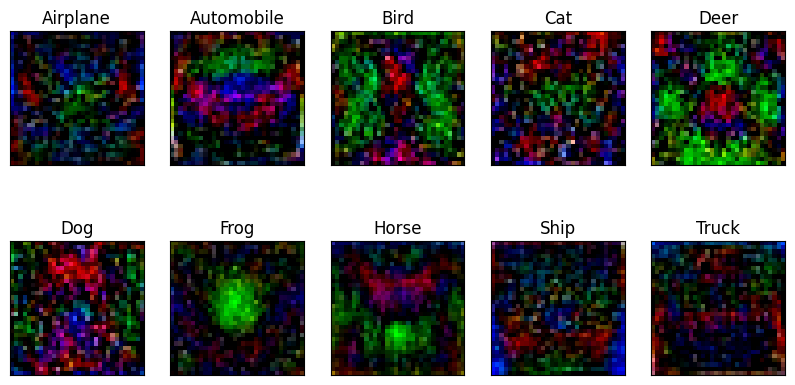

In [ ]:
from matplotlib.pyplot import figure
figure(figsize=(10, 5))
weights = model1.coef_.copy()
print(weights.shape)
classes = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog'
, 'Frog', 'Horse', 'Ship', 'Truck']
for i in range(10):
  plt.subplot(2, 5, i+1)
  weight1 = weights[i,:].reshape([32,32,3])
  weight1 *= 1.0/weight1.max()
  weight2 = np.clip(weight1, 0, 1)
  plt.title(classes[i])
  plt.imshow(weight2)
  frame1 = plt.gca()
  frame1.axes.get_xaxis().set_visible(False)
  frame1.axes.get_yaxis().set_visible(False)

Respostas

a) No EC02 estamos utilizando a regularização de Ridge por meio do hiperparametro alpha. No EC01 foi utilizado um classificador linear também com regularização por meio do coeficiente c.

b)Na RidgeClassifier precisamos especificar um valor de alpha, no caso do código acima como o valor não foi especificado foi utilizado como default o valor 1.Esse classificador converte os valores alvo em {-1, 1} e passa a tratar o problema como um problema de regressão linear.

Por outro lado, no RigdeClassifierCV o valor de alpha é determinado por meio de validação cruzada. No código foi passado uma lista de possiveis valores para alpha, e a partir dai o classificador determina o melhor valor utilizando validação cruzada do tipo Leave-One-Out.

c) A figura obtida na última célula permite visualizar os pesos aprendidos pelo modelo para cada uma das 10 classes. A partir disso podemos ter uma noção de que conjunto de pesos fazem uma imagem ser classificada como de determinado tipo, como por exemplo um sapo que consiste em um circulo verde aproximadamente centralizado. Enquanto a corça consistem em 5 formatos verdes semelhante a um circulo ao redor de um circulo vermelho e azul.

d) O RidgeClassifier não é a melhor escolha para o reconhecimento de imagens, além disso o CIFAR-10 possui imagens coloridas,com dimensões maiores (32x32) e também precisa lidar com situaçãos de orientação de imagens.Em relação ao MNIST ele possui 10.000 amostras a menos o que pode interferir no desempenho da rede.
